# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Final Exam: COVID-19 Modeling

**Harvard University**<br/>
**Summer 2021**<br/>
**Instructors**: Kevin Rader


<hr style='height:2px'>

---



### INSTRUCTIONS

- This final exam is to be completed indivudally.  Do not consult with your peers when working on it (you can aks the teaching staff for clarification questions, including private messages on Ed).
- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

**Note: for all problems, it is up to you to decide how to transform the data (standardization, log transformations, etc.).  Be sure you use and interpret theses transformations approporiately.**

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

# You are free to use any functions/methods within these packages (BS4, ELI5, and LIME are fine too)
# if you would like to use any other, please contact hte teaching staff 

<hr style="height:2pt">

# Analyzing the recent spread of COVID-19 

![](fig/vaccine.jpeg)

You are tasked with using the COVID case and vaccination data across counties presented by the CDC to analyze the recent surge in COVID infections and the association with (amonth other predictors).  You are also tasked with building prediction models to forecast how the disease spread will change based on data from the previous week (and  demographic and other measures.

The exam broken into 4 problems:
- Problem 1: Data Wrangling and Explorations
- Problem 2: Interpretive Linear Regression Modeling
- Problem 3: Prediction Modeling
- Problem 4: Further Analysis

You are provided with four raw data files, and a 5th cleaned file is provided to be used for all EDA and modeling tasks.

The variables included in each of the four raw data sets are:

For 'covid_cases_county.csv' (note: counties show up many times in this dataset: once for each data they report the number of cases):
- `date`: the date of the measurement, taken weekly
- `county`: county name
- `state`: the state in which the county lies
- `fips`: the unique Federal Information Processing System (FIPS) codes for the county
- `cases`: the cumulative number of confirmed positive cases up to and including that date
- `deaths`: the cumulative number of confirmed COVID-related deaths up to and including that date


For 'vaccines_county.csv' (note: counties show up many times in this dataset: once for each data they report the number of cases):
- `date`: the date of the measurement, taken weekly
- `fips`: the unique FIPS code for the county
- `fully`: the percent of residents that are fully vaccinated in the county on that date
- `dose1`: the percent of residents that have received at least one vaccine dose in the county on that date.

For 'masks_county.csv' (note: this is based on a survey conducted by the New York Times in summer of 2020):
- `fips`: the unique FIPS code for the county
- `never`: the percent of respondents that report they never wore masks in public
- `rarely`: the percent of respondents that report they rarely wore masks in public
- `sometimes`: the percent of respondents that report they sometimes wore masks in public	
- `frequently`: the percent of respondents that report they frequently wore masks in public	
- `always`: the percent of respondents that report they always wore masks in public

For 'demographics_county.csv' (note: these are various measures taken from 2010 to 2020):
- `fips`: the unique FIPS code for the county
- `population`: total number of residents in the country	
- `hispanic`: the percentage of residents that self-identify as hispanic
- `minority`: the percentage of residents that self-identify as a minority group (non-white)
- `female`: the percentage of residents that self-identify as female
- `unemployed`: the percentage of residents that are unemployed
- `income`: the median household income, in thousnads of dollards
- `nodegree`: the percentage of residents that report not having graduated high school
- `bachelor`: the percentage of residents that report having a college degree
- `inactivity`: the percentage of residents that get less than 1 hour of vigorous exercise a week
- `obesity`: the percentage of residents that are considered obese based on BMI
- `density`: the population density (residents per square mile)
- `votergap20`: Biden voting percentage minus Trump voting percentage in the 2020 election
- `votergap16`: Clinton voting percentage minus Trump voting percentage in the 2016 election


### Data Sources
- Vaccinations [here](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh).
- Cases [here](https://github.com/nytimes/covid-19-data).
- Mask Usage [here](https://github.com/nytimes/covid-19-data/tree/master/mask-use).
- Demographics [here](https://www.ers.usda.gov/data-products/county-level-data-sets/) 
- 2020 Election [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)



## Question 1 [25pts]: Data Wrangling and Explorations </b></div>

**1.1** Load the data sets as follows:
- 'covid_cases_county.csv' as `covid_raw` 
- 'vaccines_county.csv' as `vaccines_raw`
- 'masks_county.csv' as `masks`
- 'demographics_county.csv' as `demo` 

**1.2** Create a subset of the `covid_raw` data frame that only contains the measures for 5 dates: June 27 and July 4, 11, 18 and 25.  Do the same for the `vaccines_raw`.  Call these subsets `covid` and `vaccines`, respectively, and print out their dimensions (aka, shapes).

**1.3** Determine and print the number of counties that are measured for each time period in `covid` and `vaccines` (do not print out the list of counties, just the number/count).  Comment on what this implies for presence of missing data.

**1.4** Process both `covid` and `vaccines` so that each county is represented by a single row in each data frame (rather than having 5 separate rows for each county: 1 for each time period in part 1.2).  Call these new generate Pandas data frames `covid_by_county` and `vaccines_by_county` separately.  Print out the dimensions of each resulting data frame, and view the header of `covid_by_county`.  Note: you should use informative names for the columns in the resulting data frames: for example, `cases_w30` for the cumulative number of cases on July 25 (it's the 30th week of the calendar year).

**Hint**: Splitting based on dates and then using `pd.DataFrame.merge` (source)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html] could be helpful for this task using the `fips` code as the keys to join on (you should drop any counties that are not measured in all time periods...the default argument for `how` in `pd.DataFrame.merge` will behave this way).

**1.5** Merge the 4 data fames (`covid_by_county`, `vaccines_by_county`, `masks`, and `demo`) based on `fips` and save the result as `covid_merged` (you should drop any counties that are not measured in all 4 data frames).  Determine and report how many counties were dropped from `demo` in this process, and view the header of `covid_merged`.

**1.6** Use `covid_merged` to calculate the novel case rate (per 1000 residents) for each of the weeks for all of the counties, and save these as 4 new well-named variables in `covid_merged`.  For example, `rate_w30` can mathematically be represented as `1000*(cases_30-cases_29)/population`.  Plot the histogram of the novel case rate in week 29, `rate_w29`, and comment on what you notice.

**1.7** We did the steps above (and some other minimal processing) and saved the results in `covid_clean.csv` for you.  Use this data file to answer some exploratory questions and all future analyses: 

1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?  
2. Treating the counties as separate and equal observations: in what states did the case rate increase the most?  In what states did the case rate decrease the most (or increse the least)?  List the top 5 for each.  Do you notice any patterns in these states?
3. Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).

    a. The political views in the county (as measured by the votergap in the 2020 election).
    
    b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).
    
    c. The population density of the county.
    
    d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.

## Answers

**1.1** Load the data sets as follows:
- 'covid_cases_county.csv' as `covid_raw` 
- 'vaccines_county.csv' as `vaccines_raw`
- 'masks_county.csv' as `masks`
- 'demographics_county.csv' as `demo` 

Print out each of their dimensions (aka, shapes).

In [2]:
# Saving data sets
covid_raw = pd.read_csv('data/covid_cases_county.csv')
vaccines_raw = pd.read_csv('data/vaccines_county.csv')
masks = pd.read_csv('data/masks_county.csv')
demo = pd.read_csv('data/demographics_county.csv')

# Printing dimentions
print(f'The shape of covid_raw is {covid_raw.shape}')
print(f'The shape of vaccines_raw is {vaccines_raw.shape}')
print(f'The shape of masks is {masks.shape}')
print(f'The shape of demo is {demo.shape}')

The shape of covid_raw is (97394, 6)
The shape of vaccines_raw is (96720, 4)
The shape of masks is (3142, 6)
The shape of demo is (3114, 14)


**1.2** Create a subset of the `covid_raw` data frame that only contains the measures for 5 dates: June 27 and July 4, 11, 18 and 25.  Do the same for the `vaccines_raw`.  Call these subsets `covid` and `vaccines`, respectively, and print out their dimensions (aka, shapes).


In [3]:
# Creating a subset for specified dates:
covid = covid_raw[(covid_raw['date']=='2021-06-27') | 
                  (covid_raw['date']=='2021-07-04') | 
                  (covid_raw['date']=='2021-07-11') |
                  (covid_raw['date']=='2021-07-18') | 
                  (covid_raw['date']=='2021-07-25')]

In [4]:
# Doing the same for vaccines_raw:
vaccines = vaccines_raw[(vaccines_raw['date']=='2021-06-27') | 
                  (vaccines_raw['date']=='2021-07-04') | 
                  (vaccines_raw['date']=='2021-07-11') |
                  (vaccines_raw['date']=='2021-07-18') | 
                  (vaccines_raw['date']=='2021-07-25')]

# Printing dimentions
print(f'The shape of covid is {covid.shape}')
print(f'The shape of vaccines is {vaccines.shape}')
# vaccines

The shape of covid is (16227, 6)
The shape of vaccines is (16120, 4)


**1.3** Determine and print the number of counties that are measured for each time period in `covid` and `vaccines` (do not print out the list of counties, just the number/count).  Comment on what this implies for presence of missing data.


In [5]:
# There are many cointies names that appears in several states. Therefore we need to use the fips column to identify the 
#number of unique counties for both sets.

# Printing the number of counties for each date in covid, incase one date has less counties:
dates = ['2021-06-27','2021-07-04','2021-07-11','2021-07-18','2021-07-25']
print('The number of counties in the covid set is:')
for d in dates:
    nrCounties = len(covid.fips[covid['date']==d].value_counts())  
    print(f' {nrCounties} at date {d}')
# Choosing not to remove null values yet, and using value_counts to get the number of real values for fips.

The number of counties in the covid set is:
 3218 at date 2021-06-27
 3218 at date 2021-07-04
 3218 at date 2021-07-11
 3218 at date 2021-07-18
 3218 at date 2021-07-25


In [6]:
# The number of counties in vaccines:
print('The number of counties in the vaccines set is:')
for d in dates:
    nrFips = len(vaccines.fips[vaccines['date']==d].value_counts())
    print(f' {nrFips} at date {d}')

The number of counties in the vaccines set is:
 3224 at date 2021-06-27
 3224 at date 2021-07-04
 3224 at date 2021-07-11
 3224 at date 2021-07-18
 3224 at date 2021-07-25


##### Answer 1.3:
The vaccines set has 3224 counties while covid has 3218.
This is because the data sets are also including counties in Puerto Rico, Virgin Islands, Northern Mariana and Guam. If you were to only count the 50 states of US you would get 3218-83= 3135 counties for the covid set and 3224-82= 3142 counties in the vaccines set. The number for the vaccines set is almost the same as wikipedias number of counties for the 50 states of US (3143 in 2020), while the covid set is missing 7 more counties. Three of the missing counties have the state column filled, and can be identified as York City, Cansas City and Joplin. These should be added in if we want to use this for prediction or EDA, especially New York City because of its large population. However, I am not doing that here, because the task is not asking for cleaning of the data.

**1.4** Process both `covid` and `vaccines` so that each county is represented by a single row in each data frame (rather than having 5 separate rows for each county: 1 for each time period in part 1.2).  Call these new generate Pandas data frames `covid_by_county` and `vaccines_by_county` separately.  Print out the dimensions of each resulting data frame, and view the header of `covid_by_county`.  Note: you should use informative names for the columns in the resulting data frames: for example, `cases_w30` for the cumulative number of cases on July 25 (it's the 30th week of the calendar year).

**Hint**: Splitting based on dates and then using `pd.DataFrame.merge` (source)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html] could be helpful for this task using the `fips` code as the keys to join on (you should drop any counties that are not measured in all time periods...the default argument for `how` in `pd.DataFrame.merge` will behave this way).




In [7]:
# Splitting the dataset into separate ones for each week:
w26 = vaccines[vaccines['date']=='2021-06-27'].dropna()
w27 = vaccines[vaccines['date']=='2021-07-04'].dropna()
w28 = vaccines[vaccines['date']=='2021-07-11'].dropna()
w29 = vaccines[vaccines['date']=='2021-07-18'].dropna()
w30 = vaccines[vaccines['date']=='2021-07-25'].dropna()

vaccines_by_county = w26.merge(w27.merge(w28.merge(w29.merge(w30,on='fips'),on='fips'),on='fips'),on='fips')
vaccines_by_county.pop('date') # Removing all date columns, since the week number is the new index
vaccines_by_county.pop('date_x')
vaccines_by_county.pop('date_y')
vaccines_by_county.columns = ['fips', 'fully_w26','dose1_w26','fully_w27','dose1_w27',
              'fully_w28','dose1_w28','fully_w29','dose1_w29','fully_w30','dose1_w30']

print(f'The shape of vaccines_by_county is {vaccines_by_county.shape}')
# vaccines_by_county.tail(50)

The shape of vaccines_by_county is (3223, 11)


In [8]:
# Same for the covid set:
c26 = covid[covid['date']=='2021-06-27'].dropna()
c27 = covid[covid['date']=='2021-07-04'].dropna()
c28 = covid[covid['date']=='2021-07-11'].dropna()
c29 = covid[covid['date']=='2021-07-18'].dropna()
c30 = covid[covid['date']=='2021-07-25'].dropna()

covid_by_county=c26.merge(c27.merge(c28.merge(c29.merge(c30,on='fips'),on='fips'),on='fips'),on='fips')
covid_by_county.pop('date') # Removing all date columns, since the week number is the new index.
covid_by_county.pop('date_x')
covid_by_county.pop('date_y')
covid_by_county.pop('state_x')
covid_by_county.pop('state_y')
covid_by_county.pop('county_x')
covid_by_county.pop('county_y');
covid_by_county.columns = ['county','state','fips','cases_w26','deaths_w26','cases_w27', 
        'deaths_w27', 'cases_w28', 'deaths_w28', 'cases_w29', 'deaths_w29', 'cases_w30', 'deaths_w30']

print(f'The shape of vaccines_by_county is {vaccines_by_county.shape}')
print(f'The shape of covid_by_county is {covid_by_county.shape}')
covid_by_county.head(0)

The shape of vaccines_by_county is (3223, 11)
The shape of covid_by_county is (3140, 13)


,county,state,fips,cases_w26,deaths_w26,cases_w27,deaths_w27,cases_w28,deaths_w28,cases_w29,deaths_w29,cases_w30,deaths_w30


##### Answer 1.4:
Some counties, including all the counties from Puerto Rico and Guam has been dropped from the covid_by_county set because there were missing values, while the vaccines_by_county kept most counties. In this task I could have added in the county codes for York City, Cansas City and Joplin, which would have given other shapes of the data from here and onwards. I am choosing to not do that here as well, since it is not specified in the excercise.

**1.5** Merge the 4 data fames (`covid_by_county`, `vaccines_by_county`, `masks`, and `demo`) based on `fips` and save the result as `covid_merged` (you should drop any counties that are not measured in all 4 data frames).  Determine and report how many counties were dropped from `demo` in this process, and view the header of `covid_merged`.



In [9]:
# First checking the current status of demo for my own sanity.
demo.shape
len(demo.fips.value_counts())
np.sum(demo.isnull())
print('Demo initially includes 3114 counties, and no NaN values.')

Demo initially includes 3114 counties, and no NaN values.


In [10]:
data_frames = [covid_by_county, vaccines_by_county, masks, demo]
# Can merge manually like I showed above, but assuming we can use functools to simplity this process:
from functools import reduce 
covid_merged = reduce(lambda  left,right: pd.merge(left,right,on=['fips'],
                                            how='inner'), data_frames)
print(f'There are {demo.shape[0]-covid_merged.shape[0]} columns that were dropped from demo because they were not measured in all data frames.')
covid_merged.head(0)

There are 6 columns that were dropped from demo because they were not measured in all data frames.


,county,state,fips,cases_w26,deaths_w26,cases_w27,deaths_w27,cases_w28,deaths_w28,cases_w29,...,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,votergap20,votergap16


#### Comment:
Normally I would rearrange the columns so that all columns relating to one week are placed after each other, but since it is not a part of the task I choose to not do this here.

**1.6** Use `covid_merged` to calculate the novel case rate (per 1000 residents) for each of the weeks for all of the counties, and save these as 4 new well-named variables in `covid_merged`.  For example, `rate_w30` can mathematically be represented as `1000*(cases_30-cases_29)/population`.  Plot the histogram of the novel case rate in week 29, July 12-18, `rate_w29`, and comment on what you notice.



In [11]:
# Creating new variables for the case rate per 1000 resident for 4 weeks:
rate_w27 = 1000*(covid_merged['cases_w27']-covid_merged['cases_w26'])/covid_merged['population']
rate_w28 = 1000*(covid_merged['cases_w28']-covid_merged['cases_w27'])/covid_merged['population']
rate_w29 = 1000*(covid_merged['cases_w29']-covid_merged['cases_w28'])/covid_merged['population']
rate_w30 = 1000*(covid_merged['cases_w30']-covid_merged['cases_w29'])/covid_merged['population']

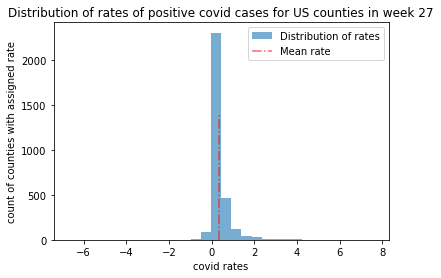

In [57]:
plt.hist(rate_w27, bins=30, alpha=0.6, label='Distribution of rates')
plt.vlines(np.mean(rate_w27),ymin=0,ymax=1400, color='r', linestyles='-.',alpha=0.6, label='Mean rate')
plt.xlabel('covid rates')
plt.ylabel('count of counties with assigned rate')
plt.title('Distribution of rates of positive covid cases for US counties in week 27')
plt.legend()
plt.show()

In [13]:
# Checking where the negative values come from:
rate_w27[rate_w27<0]
covid_merged.iloc[175,:];
# There seems to occur corrections in the cumulative number of covid cases, where it can be lowered.

##### Answer 1.6:
The plot shows that the rate of covid cases has a distribution that is right skewed with tails in both directions. I would originally not expect a left tail in this situation, but assume that this comes from corrections in the number of cases that is registered, in which it can end up having a lower registered cumulative number of cases in a later week.   
Other than that things are as expected with a peak around 0, with a right tail and a mean a bit higher than 0.

**1.7** We did the steps above (and some other minimal processing) and saved the results in `covid_clean.csv` for you.  Use this data file to answer some exploratory questions and all future analyses: 

1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?  
2. Treating the counties as separate and equal observations: in what states did the case rate increase the most?  In what states did the case rate decrease the most (or increse the least)?  List the top 5 for each.  Do you notice any patterns in these states?
3. Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).

    a. The political views in the county (as measured by the votergap in the 2020 election).
    
    b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).
    
    c. The population density of the county.
    
    d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.

In [14]:
covid_clean = pd.read_csv('data/covid_clean.csv')

# Multiplying rate variables with 1000, to get rate per 1000 resident:
covid_clean['rate_w30'] = 1000*covid_clean['rate_w30']
covid_clean['rate_w29'] = 1000*covid_clean['rate_w29']
covid_clean['rate_w28'] = 1000*covid_clean['rate_w28']
covid_clean['rate_w27'] = 1000*covid_clean['rate_w27']

In [15]:
#Q1.7.1: Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?
print('Overall average case rate week 28: {:.4}'.format(np.mean(covid_clean['rate_w28'])))
print('Overall average case rate week 29: {:.4}'.format(np.mean(covid_clean['rate_w29'])))

print('Yes, the overall average case rate has increased from 0.46 to 0.66 positive cases per 1000 resident')

Overall average case rate week 28: 0.4607
Overall average case rate week 29: 0.6592
Yes, the overall average case rate has increased from 0.46 to 0.66 positive cases per 1000 resident


In [16]:
# Q1.7.2:

# Using Groupby to get an overview of rates for the states and weeks we care about:
state_rates       = covid_clean.groupby('state').agg({'rate_w28': np.mean, 'rate_w29': np.mean})
state_rate_change = state_rates['rate_w29']-state_rates['rate_w28']

# Sorting the rate changes from lowest to highest:
sorted_chang = pd.DataFrame(state_rate_change, columns=['rates']).sort_values(by=['rates'])
print('The five states that had the highest increase in covid rates between week 28 and 29:')
display(sorted_chang.tail())
print('The five states that had the highest decrease / lowest increase in covid rates between week 28 and 29:')
display(sorted_chang.head())

print('A pattern here is that the states with the highest increase (except Nevada) are all located close to each other, which makes sense as when there is a surge in covid cases it will normally spread geographically.')

The five states that had the highest increase in covid rates between week 28 and 29:


,rates
state,
Louisiana,0.423863
Nevada,0.455317
Arkansas,0.554481
Missouri,0.758939
Florida,1.120848


The five states that had the highest decrease / lowest increase in covid rates between week 28 and 29:


,rates
state,
Iowa,-0.214847
Colorado,-0.198926
Montana,-0.041464
Virginia,-0.009347
Utah,0.006025


A pattern here is that the states with the highest increase (except Nevada) are all located close to each other, which makes sense as when there is a surge in covid cases it will normally spread geographically.


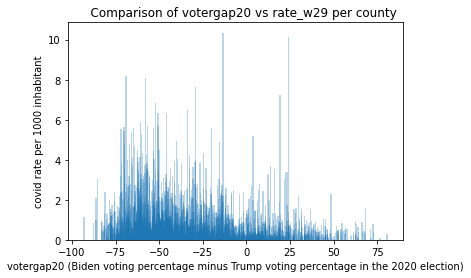

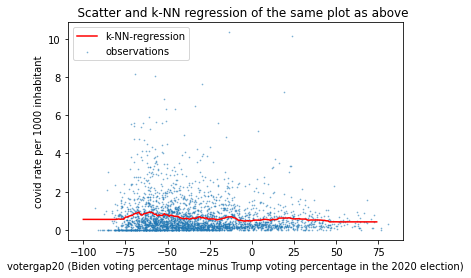

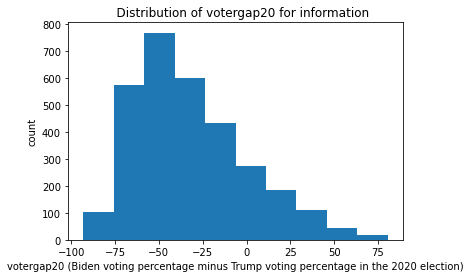

In [17]:
# Q1.7.2:
# a: The political views in the county (as measured by the votergap in the 2020 election).

# Don't think we are supposted to begin with regression yet, but do it additionally as it gives a good addition to the plot:
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor(n_neighbors=200)
knn1.fit(covid_clean['votergap20'].values.reshape(-1, 1), covid_clean['rate_w29'])
x_dummy1 = np.arange(-100,75,1)
yhat_dummy100 = knn1.fit(covid_clean['votergap20'].values.reshape(-1, 1), covid_clean['rate_w29']).predict(x_dummy1.reshape(-1, 1))

# Plotting: Bar plot
plt.bar(covid_clean['votergap20'], covid_clean['rate_w29'], alpha=0.3)
plt.xlabel('votergap20 (Biden voting percentage minus Trump voting percentage in the 2020 election)')
plt.ylabel('covid rate per 1000 inhabitant')
plt.title('    Comparison of votergap20 vs rate_w29 per county')
plt.show() # Could make subplots like I do in the next task, but thought this is just as fine here.

# Scatter and regression line:
plt.scatter(covid_clean['votergap20'], covid_clean['rate_w29'], s=0.5, alpha=0.5, label='observations')
plt.plot(x_dummy1,yhat_dummy100, color='r', label='k-NN-regression')
plt.legend()

plt.xlabel('votergap20 (Biden voting percentage minus Trump voting percentage in the 2020 election)')
plt.ylabel('covid rate per 1000 inhabitant')
plt.title('    Scatter and k-NN regression of the same plot as above')
plt.show()
plt.hist(covid_clean['votergap20'])
plt.xlabel('votergap20 (Biden voting percentage minus Trump voting percentage in the 2020 election)')
plt.ylabel('count')
plt.title('    Distribution of votergap20 for information');



##### Answer Q1.7.3 a:
The plot of rates needs to be seen in relation to the histogram showing the density of counties for the different values of votergap20. This is because a higher density leads to a higher probability of getting one county for that value of votergap that is high enough for us to visually interpret this different from other readings in the bar plot.   
Since there is a higher density on the trump side of votergap20 we also need to be careful with interpreting the values in this area. A more fair comparison is comparing the values between votergap20: (-90)-(-75) with votergap20: 25-45, since these have a more similar amount of counties. When comparing these ranges we see that there is not a clear "winner", but the Biden side (25-45) seems to generally have lower rates, but with sporadic higher values that are on the same level as the compared Trump side.

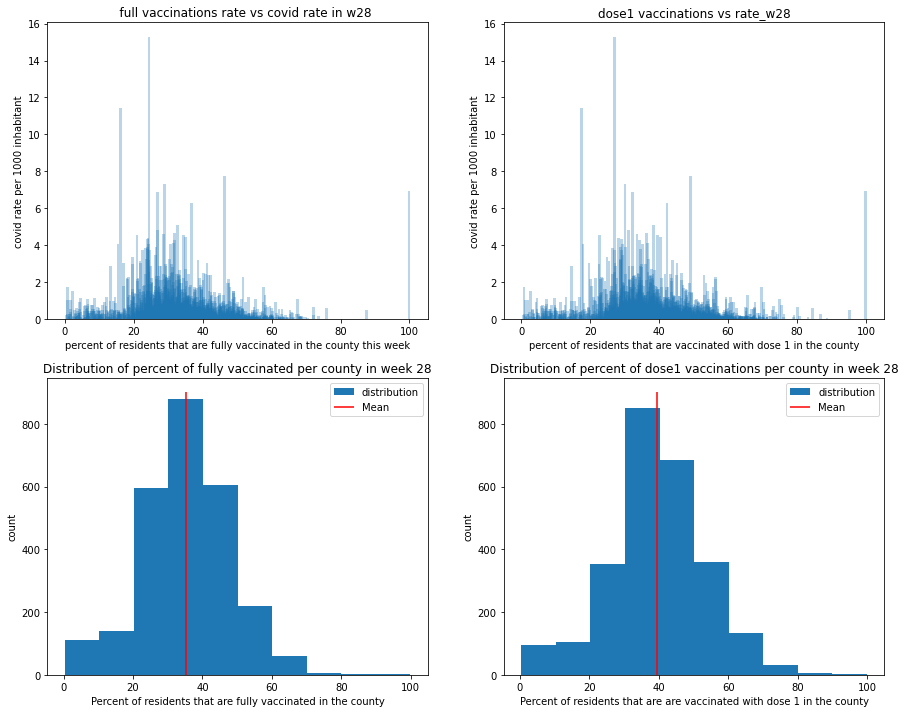

In [18]:
# b. The vaccination rate in the county for week 28:

# Dropping 0 values as suggested in the task:
covid_clean_drop0 = covid_clean[(covid_clean.fully_w28 != 0)&(covid_clean.dose1_w28 != 0)]
# Plotting for fully vaccinated:    
fig, ax = plt.subplots(2,2,figsize=(15,12))
ax[0,0].bar(covid_clean_drop0['fully_w28'], covid_clean_drop0['rate_w28'], alpha=0.3)
ax[1,0].hist(covid_clean_drop0['fully_w28'], label='distribution')
ax[1,0].vlines(np.mean(covid_clean_drop0['fully_w28']),ymin=0,ymax=900, color='r', label='Mean')
ax[0,0].set_xlabel('percent of residents that are fully vaccinated in the county this week')
ax[0,0].set_ylabel('covid rate per 1000 inhabitant')
ax[0,0].set_title('    full vaccinations rate vs covid rate in w28')
ax[1,0].set_xlabel('Percent of residents that are fully vaccinated in the county')
ax[1,0].legend()
ax[1,0].set_ylabel('count')
ax[1,0].set_title('Distribution of percent of fully vaccinated per county in week 28')

# looking at only dose 1:
ax[0,1].bar(covid_clean_drop0['dose1_w28'], covid_clean_drop0['rate_w28'], alpha=0.3)
ax[1,1].hist(covid_clean_drop0['dose1_w28'], label='distribution')
ax[1,1].vlines(np.mean(covid_clean_drop0['dose1_w28']),ymin=0,ymax=900, color='r', label='Mean')
ax[1,1].legend()
ax[0,1].set_xlabel('percent of residents that are vaccinated with dose 1 in the county')
ax[0,1].set_ylabel('covid rate per 1000 inhabitant')
ax[0,1].set_title('dose1 vaccinations vs rate_w28')
ax[1,1].set_xlabel('Percent of residents that are are vaccinated with dose 1 in the county')
ax[1,1].set_ylabel('count')
ax[1,1].set_title('Distribution of percent of dose1 vaccinations per county in week 28')
plt.show()

In [19]:
# Checking what the 100% value is:
np.sort(covid_clean_drop0['fully_w28'])
covid_clean_drop0[covid_clean_drop0['fully_w28']==99.9]
# Chattahoochee seems to have incorrect data about % vaccinations, and is registered to 99.9% in this set. 
# This does not align with what i find on Google and should be corrected, but I choose to let it be here.

,fips,date,county,state,cases_w30,deaths_w30,fully_w30,dose1_w30,cases_w26,deaths_w26,...,votergap16,never,rarely,sometimes,frequently,always,rate_w30,rate_w29,rate_w28,rate_w27
385,13053,2021-07-25,Chattahoochee,Georgia,4814,17,99.9,99.9,4487,17,...,-11.055,6.1,7.2,10.8,21.4,54.5,1.319261,10.345785,6.94348,4.096653


##### Answer Q1.7.3 b:
From a first glance at the plots to the left we see high covid rates (above 5 per 1000) only for counties where vaccination rates are below 50% both when looking at dose 1 and fully vaccinated (not counting the faulty 99.9% vaccination from Chattahoochee).   
When we start digging deeper we need to remember that this bar plot will also have a higher chance of showing a high bar when there are more counties plotted at one range of vaccines (e.g. around 35% vaccinations there are much more occurrances than at 70+). However, on the histogram we can see a resemblence of normal distribution around 35 for 'fully' and 40 for 'dose1' (with a larger left tail on both). A good approach can be to interpret the difference on both sides of these means.    
With this in mind we see higher covid rates in the area to the left of each mean, than to the right, showing that the observed values of covid rates was higher for counties that has lower vaccination.   
Lastly we also need to remember that even though there should be a causal relationship between vaccines and lower covid rates, that cannot be confirmed statistically without experimental testing. Theoretically these differences could be due to people in states with vaccinations are generally better at following rules than in states where it is not vaccinated as much, or similar.

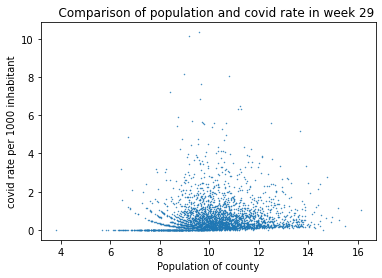

In [20]:
# Create and interpret separate visuals to display how the country 
#case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).
# c. The population density of the county.
plt.scatter(np.log(covid_clean['population']), covid_clean['rate_w29'], s=0.2)
plt.xlabel('Population of county')
plt.ylabel('covid rate per 1000 inhabitant')
plt.title('    Comparison of population and covid rate in week 29')
plt.show()


##### Answer Q1.7.3 c:
When we plot using the log-transformation of the population there is not a clear relationship between the covid rates and the population. There seems to be a rather even spread, with higher max values for the population of e^10 which is the most common population, and thus might be explaining the high max by it's increased variance. So it is hard to say by this plot weather there was a relationship between population and covid rates in week 29.   
Can do for example a k-NN regression here as well to see better if there is a relationship.

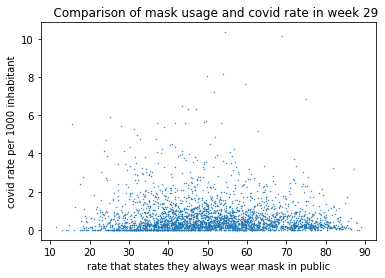

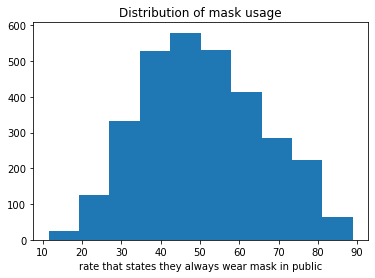

In [21]:
# d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the 
#time of the survey.

plt.scatter(covid_clean['always'], covid_clean['rate_w29'], s=0.2)
plt.xlabel('rate that states they always wear mask in public')
plt.ylabel('covid rate per 1000 inhabitant')
plt.title('    Comparison of mask usage and covid rate in week 29')
plt.show()
plt.hist(covid_clean['always'])
plt.title('Distribution of mask usage')
plt.xlabel('rate that states they always wear mask in public');
# covid_clean.always

##### Answer 1.7.3 d:
There is not a clear relationship to see with my bare eye when plotting percentage stating they always use mask towards covid rate. This is curious as one would think mask usage would have a noticable impact on the covid rates. The reason might be that the questionnaire is reflecting the truth about mask usage, or that mask usage only has a minor effect that we need better tools to see than visually on a scatter plot.   
This can be better visusalized with a regression line but I don't think I'm supposed to do that here. 

##### Answer 1.7:  (Recap for convenience, they are also answered below each excercise)
Q1.7.1: Check answer under the excercise  
Q1.7.2: Check answer under the excercise  
Q1.7.3 
- a: Check answer under the excercise
- b: Check answer under the excercise

---

## Question 2 [35pts]: Regression modeling 

**2.1** Fit a linear regression model to predict `rate_w29` (which represent the rate of new cases in the week of July 12-18) from `rate_w28` (July 5-11). Report the 95% confidence intervals for the coefficients, and carefully interpret the coefficients (including their statistical significances).  What does this model suggest about whether the rate of COVID infection increased from week 28 to week 29?


**2.2** Fit a linear regression model to predict `rate_w29` from `rate_w28` and `votergap20` along with the interaction between the two.  Interpret the coefficient estimates carefully (no need to mention significances).


**2.3** Create a scatterplot of `rate_w29` vs. `rate_w28`.  Add 3 separate predicted lines from your model in 2.2 to this scatterplot: the predicted line from the model in 2.2 for counties...
    1. where Biden was favored by 50 percentage points.
    2. where Biden and Trump were equal
    3. where Trump was favored by 50 percentage points.
Interpret what you see.


**2.4** Fit a linear regression model to assess the overall association of vaccination rate (`fully_w28`) on `rate_w29`.  Carefully interpret the results (including the statistical significance).  


**2.5** Many counties have the value zero for `fully_w28` which really represents a missing/unreported value for vaccinationr rate.  Comment on the effect of ignoring this issue can have on the intepretations and inferences in the model in 2.4.  What would be a better way of handling this issue?


**2.6** What factors could be confounded (whether mesured here or not) with the result seen in the model from 2.3 (list up to 3)?  Fit an appropriate linear model that controls for as many of these factors as possible (for those that are measured in this data set). Interpret the coefficient estimates from this model and compare to the results from 2.4.

**2.7** What major issue could arise if you fit a model to predict `rate_w29` from `rate_w28` and `rate_w27` (or from `fully_w28` and `fully_w27`) in a linear regression model?  Suggest and explain the use of two different approaches to account for this: one approach should be based on modeling and one approach should be based on feature engineering/variable transformations (not PCA). 

**2.8** The test set has a response variable that is `rate_w30`.  How would you use your models to predict `rate_w29` in this section in order to predict `rate_w30` instead?  Explain.  What could go wrong in this modification?

**Hint**: what should be the predictors to predict `rate_w30` instead of `rate_w29`? 


## Answers

**2.1** Fit a linear regression model to predict `rate_w29` (which represent the rate of new cases in the week of July 12-18) from `rate_w28` (July 5-11). Report the 95% confidence intervals for the coefficients, and carefully interpret the coefficients (including their statistical significances).  What does this model suggest about whether the rate of COVID infection increased from week 28 to week 29?


In [22]:
# 2.1
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression

# Choosing to not standardize predictors yet, for easier interpretation.
# Making a copy for the set, for my own sanity:
covid_copy = covid_clean.copy()

#Setting this as y since that is what we are predicting the most here:
y_train = covid_copy['rate_w29'] 

# Using statsmodels to find confidence intervals, betas and t values:
X_train = sm.tools.tools.add_constant(covid_copy['rate_w28'].values)
reg_OLS = sm.OLS(y_train, X_train).fit()
beta0_OLS = reg_OLS.params[0]
beta1_OLS = reg_OLS.params[1]

# Lots of printing here, so using bold color for readability in the output:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'
print(color.BOLD + 'Coefficients:' + color.END,f'''
Beta0(the intercept) is {beta0_OLS:.4}, which means that counties with a rate of 0 in week 28 we predict a rate of {beta0_OLS:.4} in week 29.
Beta1 (the slope) is {beta1_OLS:.4} which means that for an increase in the week 28 covid rate of 1 our prediction for the rate in week 29 increases with {beta1_OLS:.4}.
This actually shows predicts a lower rate 
''',color.BOLD + '\nT-value:' + color.END,f'''
Beta0 has a t value of {reg_OLS.pvalues[0]:.3}, and beta 1 has a t value of {reg_OLS.pvalues[1]:.3}.
We can see that the t values for both coefficients are much lower than 0.05 and very significant.'''
      ,color.BOLD + '\n\nConfidence intervals' + color.END,
      f''':
The confidence interval for the coefficients are like this:
    Beta0: [{reg_OLS.conf_int(0.05).iloc[0,0]:.3} : {reg_OLS.conf_int(0.05).iloc[0,1]:.3}]
    Beta1: [{reg_OLS.conf_int(0.05)[0][1]:.3} : {reg_OLS.conf_int(0.05).iloc[1,1]:.3}]''')

Coefficients: 
Beta0(the intercept) is 0.355, which means that counties with a rate of 0 in week 28 we predict a rate of 0.355 in week 29.
Beta1 (the slope) is 0.6603 which means that for an increase in the week 28 covid rate of 1 our prediction for the rate in week 29 increases with 0.6603.
This actually shows predicts a lower rate 
 
T-value: 
Beta0 has a t value of 1.55e-121, and beta 1 has a t value of 0.0.
We can see that the t values for both coefficients are much lower than 0.05 and very significant. 

Confidence intervals :
The confidence interval for the coefficients are like this:
    Beta0: [0.327 : 0.383]
    Beta1: [0.631 : 0.69]


Most of the counties will fall in the range of a rate between 2.16 and 0 so will use that as limits in the plot:


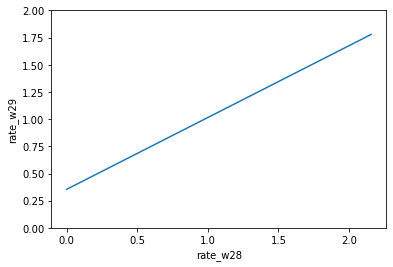

In [23]:
# Plotting to see the relationship better:
upper=np.mean(covid_copy['rate_w28'])+2*np.std(covid_copy['rate_w28'])
lower=max(0,np.mean(covid_copy['rate_w28'])-2*np.std(covid_copy['rate_w28']))
print(f'Most of the counties will fall in the range of a rate between {upper:.3} and {lower} so will use that as limits in the plot:')
x_pred = np.linspace(lower, upper, len(reg_OLS.predict(X_train)))
plt.plot(x_pred, reg_OLS.predict(sm.add_constant(x_pred)))
plt.ylim((0, 2)) #set limit for axis
plt.ylabel('rate_w29')
plt.xlabel('rate_w28')
plt.show()

##### Answer 2.1:
(See additional answers printed above, this is just the interpretation)   
We see (from the plot and the sub-zero beta coefficient) that for lower covid rates the model predicts an increase from week 28 to week 29, while for rates higher than around 1 (per 1000 resident) it predicts the rate to decrease from week 28 to 29.

**2.2** Fit a linear regression model to predict `rate_w29` from `rate_w28` and `votergap20` along with the interaction between the two.  Interpret the coefficient estimates carefully (no need to mention significances).


In [24]:
# Using sklearn this time.
covid_copy['rate28_X_votergap'] = covid_copy['rate_w28']*covid_copy['votergap20']

# Supressing SettingWithCopyWarning:
pd.options.mode.chained_assignment = None 

In [25]:
# Fitting reg model:
reg_linear = LinearRegression().fit(covid_copy[['rate_w28', 'votergap20', 'rate28_X_votergap']], y_train)

# Coefficiants:
print(f'The intercept (beta0) is {reg_linear.intercept_:.3} and indicates that when there is an equal amount of votes between Biden and Trump (votergap20=0), as well as no new covid cases in week 28, it is predicted a covid rate of 0.114 per 1000 resident in week 29.')
print(f'The coefficients (beta1) are the following:\n   *rate_w28: {reg_linear.coef_[0]:.3}\n   *votergap20: {reg_linear.coef_[1]:.3}\n   *Interaction term:{reg_linear.coef_[2]:.3}')

The intercept (beta0) is 0.136 and indicates that when there is an equal amount of votes between Biden and Trump (votergap20=0), as well as no new covid cases in week 28, it is predicted a covid rate of 0.114 per 1000 resident in week 29.
The coefficients (beta1) are the following:
   *rate_w28: 1.19
   *votergap20: -0.0048
   *Interaction term:0.0102


##### Answer 2.2: 
See intercept interpreted in print above.   
The coefficients indicates that for an increase of 1 in rate_w28, while holding votergap constant, there will be an increase in the predicted covid rate in week 29 by 1.19. This is much higher than in the previous model, and we see that including votergap20 and the interaction term had an effect as they are correlated. The same concept applies for votergap20. The interaction terms coefficient is the additional effect from varying both variables, and shows that e.g. when both the covid rate is high in week 28, and there is lean towards voting for Biden, the predicted rate for week 29 will be higher.')

**2.3** Create a scatterplot of `rate_w29` vs. `rate_w28`.  Add 3 separate predicted lines from your model in 2.2 to this scatterplot: the predicted line from the model in 2.2 for counties...
    1. where Biden was favored by 50 percentage points.
    2. where Biden and Trump were equal
    3. where Trump was favored by 50 percentage points.
Interpret what you see.




Most of the counties will fall in the range of a rate between 2.16 and 0 so will use that as limits in the plot to make it more interpretable:


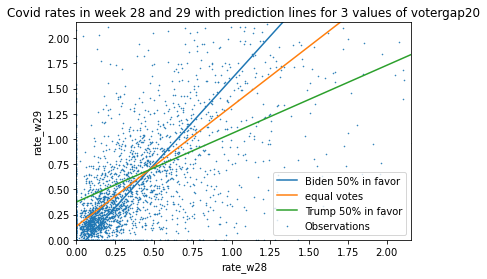

In [26]:
plt.scatter(covid_copy['rate_w28'],y_train, s=0.3, label='Observations')

# Creating dummies for each scenario for convenience:
covid_copy['dummy_rate'] = np.linspace(np.min(covid_copy['rate_w28']), np.max(covid_copy['rate_w28']), len(covid_copy['rate_w28']))
covid_copy['dummy_biden'] = [50]*len(covid_copy['rate_w28'])
covid_copy['dummy_intercept_biden'] = covid_copy['dummy_rate']*covid_copy['dummy_biden']
covid_copy['dummy_equal'] = [0]*len(covid_copy['rate_w28'])
covid_copy['dummy_intercept_equal'] = covid_copy['dummy_rate']*covid_copy['dummy_equal']
covid_copy['dummy_Trump'] = [-50]*len(covid_copy['rate_w28'])
covid_copy['dummy_intercept_Trump'] = covid_copy['dummy_rate']*covid_copy['dummy_Trump']


# Regression line for where Biden was favored by 50 percentage points:
plt.plot(covid_copy[['dummy_rate']], reg_linear.predict(covid_copy[['dummy_rate', 'dummy_biden', 'dummy_intercept_biden']]),label="Biden 50% in favor")
# where Biden and Trump were equal:
plt.plot(covid_copy[['dummy_rate']], reg_linear.predict(covid_copy[['dummy_rate', 'dummy_equal', 'dummy_intercept_equal']]),label="equal votes")
# where Trump was favored by 50 percentage points:
plt.plot(covid_copy[['dummy_rate']],reg_linear.predict(covid_copy[['dummy_rate','dummy_Trump','dummy_intercept_Trump']]),label="Trump 50% in favor")
plt.legend()

upper=np.mean(covid_copy['rate_w28'])+2*np.std(covid_copy['rate_w28'])
lower=max(0,np.mean(covid_copy['rate_w28'])-2*np.std(covid_copy['rate_w28']))
print(f'Most of the counties will fall in the range of a rate between {upper:.3} and {lower} so will use that as limits in the plot to make it more interpretable:')
plt.xlim((lower, upper)) #setting limit for axis to make sense
plt.ylim((lower, upper)) 
plt.title('Covid rates in week 28 and 29 with prediction lines for 3 values of votergap20')
plt.ylabel('rate_w29')
plt.xlabel('rate_w28')
plt.show()

##### Answer 2.3:
We see that for counties voting for Biden there is a low predicted covid rate for week 29 when the rate from week 28 is low, but that it has a steep increase in the prediction for week 29 when the rate increases for week 28. For Trump voters it has a high prediction for week 29 even then the prediction for week 28 is 0, but because of it's low slope, the prediction for Biden voters has surpassed it when the covid rate for week 28 is increased to 0.5.   
My initial interpretation of this is that it seems to be higher general covid rates for states with more Trump voters, but that the spread is higher when rates start increasing in counties with more Biden voters. The reason for this is probably because the population (which we have not included here, and therefore gets assigned to the votergap variable) is generally higher in the Biden states, where a covid surge will have a higher potential for spreading. In small, rural counties it will be a much lower potential for spread with less close contacts, and this is more typically counties where the majority is voting for Trump.   
Final note: Optionally we could plot the log transformed plot to get a more even distribution of the values, but the regular plot is sufficient in this case.

**2.4** Fit a linear regression model to assess the overall association of vaccination rate (`fully_w28`) on `rate_w29`.  Carefully interpret the results (including the statistical significance).  




In [27]:
# Fitting with statsmodels:
X = sm.tools.tools.add_constant(covid_copy['fully_w28'].values)
reg_OLS = sm.OLS(y_train, X).fit()

beta0 = reg_OLS.params[0]
beta1 = reg_OLS.params[1]
print('Answer 2.4:')
print(color.BOLD + 'Coefficients:' + color.END,f'''
The intercept is {beta0:.4} and means that when 0% of the county\'s population is fully vaccinated the covid rate in week 29 is predicted to be {beta0:.4}.

The coefficient is {beta1:.3} which means that for every percentage increase in full vaccinations the covid rate is predicted to be decreased by {beta1:.3}.

''',color.BOLD + 'T values::' + color.END,f'''
The statistical significance for the intercept is {reg_OLS.pvalues[0]:.3}, which is far lower than 0.05 and very significant.
For the coefficient the p value is {reg_OLS.pvalues[1]:.3} which is also very significant, which means that we with a very high certainty can say that there is a relationship between full vaccinations measured in the counties and covid infection rate measured in week 29.''')

Answer 2.4:
Coefficients: 
The intercept is 0.8717 and means that when 0% of the county's population is fully vaccinated the covid rate in week 29 is predicted to be 0.8717.

The coefficient is -0.0067 which means that for every percentage increase in full vaccinations the covid rate is predicted to be decreased by -0.0067.

 T values:: 
The statistical significance for the intercept is 7.94e-116, which is far lower than 0.05 and very significant.
For the coefficient the p value is 1.03e-10 which is also very significant, which means that we with a very high certainty can say that there is a relationship between full vaccinations measured in the counties and covid infection rate measured in week 29.


**2.5** Many counties have the value zero for `fully_w28` which really represents a missing/unreported value for vaccinationr rate.  Comment on the effect of ignoring this issue can have on the intepretations and inferences in the model in 2.4.  What would be a better way of handling this issue?




##### Answer 2.5:
The value of 0 for rows where there is unreported values makes it seem like the number of vaccinations are lower than it is in the counties that are not reporting this, which leads to an incorrect output for our coefficients and unprecise interpretations. Specifically in which direction it weakens our coefficients here depends on which counties that are not reporting this (high or low covid rate).    
In order to correct this issue we should either drop the rows that have 0, or inpute a value. Dropping the row leads to this county not being measured, and a less comprehensive model. Imputing a value can be done in several ways:
* Imputing the mean or median value of vaccinations.
* Modelling the value of vaccinations based on the other variables we have. With this approach we generally have a better chance of imputing the correct value by accounting for the counties population and other factors that probably affect the vaccination in the county. Additionally we could add in the uncertainty to the model in order to capture the variance that occurs in reality.
* Another way to handle this could be to impute a new variable where we indicate weather this is a missing (in this case 0) value or not. Additionally we impute the mean or similar instead of the zero.
* An alternative is to just impute a random observed value for vaccinations in to each 0 entry (hot deck imputation).   

I would choose to model the imputation with uncertainty in order to best capture the relationship, since we do have many variables here that could do a decent job in predicting the county's vaccination rate.

**2.6** What factors could be confounded (whether mesured here or not) with the result seen in the model from 2.3 (list up to 3)?  Fit an appropriate linear model that controls for as many of these factors as possible (for those that are measured in this data set). Interpret the coefficient estimates from this model and compare to the results from 2.4.



### Comment:
I did this task based on the text stated above, and didn't see the correction until right before hand-in saying it is actually referring to task 2.4. Since I did not have time to change this, I hope I am not deducted by comparing to the variables 'rate_w28' and 'votergap20' from 2.3.  

##### Answer part 1: Choise of predictors that could be confounding:
Factors that could be confounded with the model from 2.3, relating covid rates in week 29 with votergap20 and rate_28:
* Density: I believe density is a confounder for votergap, making it seem like people who vote for Biden has less spread initially and then rising quicker qhen spread starts. Higher density should lead to a quicker spread once it gets going, and big, dense cities are more often voting for Biden.
* Mask usage: I can imagine that mask usage has a relationship with votergap, and is a factor that should have a causal relationship with covid rate. If it has any relationship with votergap it is will therefore be confounding. 
* Age of population: Student counties for example will probably have a higher spread rate than counties with an old population, and also affects votes.

In [28]:
# I first interpreted the task to ask for all possible features in covid_clean, but read from Ed that we should include 
#the ones that are possible from our listed 3 confounding variables. Updated now.

# Normalizing the density variable to get it on the range of 0 to 1 which is the same as 'always':
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
density_scaled = scaler.fit_transform(covid_clean[['density']])
# covid_Norm = pd.DataFrame(covid_Norm, columns=columns_to_include)
# covid_copy[['rate_w28', 'votergap20', 'rate28_X_votergap']]
# covid_Norm['rate28_X_votergap']
density_scaled
covid_clean['density_scaled'] = density_scaled


predictors_to_include = ['density_scaled', 'always', 'rate_w28', 'votergap20']
# Assigning X and y:
X_full = covid_clean[predictors_to_include]
y = covid_clean['rate_w29']
# Fitting multiple regression model:
reg_linear_all = LinearRegression().fit(X_full, y)

# Creating a dataframe of all coefficients (now corrected to two) sorted from highest absolute value to lowest:
zip(predictors_to_include, reg_linear_all.coef_)
coeffs = pd.DataFrame(zip(predictors_to_include, reg_linear_all.coef_), columns=['Predictor','Coefficient'])
coeffs = coeffs.reindex(coeffs.Coefficient.abs().sort_values(ascending=False).index)
display(coeffs)
print(f'Intercept: {reg_linear_all.intercept_:.4}')

,Predictor,Coefficient
2,rate_w28,0.655879
0,density_scaled,-0.597379
3,votergap20,-0.001433
1,always,0.001392


Intercept: 0.2428


##### Answer 2.6 part 2: Interpretation:   
The beta coefficient for density implies a negative relationship between covid rate and density. This is interesting, since one would think that higher density leads to being around more people and thus higher risk of covid spread. One reason it not be like that can be that people take more precautions in the cities because of the risk of spread. However, that is something one would expect being reflected in the usage of masks, but we will get to that in a second. The value means that for the county with the highest density, there rate is predicted to be ~0.6/1000 resident lower than for the county with the lowest density.   

The coefficient for always wearing mask has a weak relationship, and implies that for every percentage increase in people stating they 'always' use masks in public, the covid rate is predicted to be decreased by 0.002332. It could be that this is caused by multicolinearity with density, as one would assume higher usage of masks in denser cities. If we were to fit a model with 'always' alone we would probably get a very different result here. 
The rate_w28 is still the strongest and the interpretation from before still applies.
The intercept means that when 0% of residents report that they wear masks in public and the density is at it's lowest, the rate is predicted to be 0.2428 per 1000 resident. (The comparison lost it's meaning when comparing to 2.3)

**2.7** What major issue could arise if you fit a model to predict `rate_w29` from `rate_w28` and `rate_w27` (or from `fully_w28` and `fully_w27`) in a linear regression model?  Suggest and explain the use of two different approaches to account for this: one approach should be based on modeling and one approach should be based on feature engineering/variable transformations (not PCA). 



When predicting rate_29 from predictors that are similar like rate_w28 and rate_w27 we can get multicolinnearity between the predictors. One of the assumptions of OLS regression is that the variables individually impacts the response, which is not the case with multicolinnearity. This will lead to wider confidence intervals for our predictors, as well as impact the way we interpret our coefficiants, and you cannot change one predictor while holding all others constant since they are correlated.    
This can be solved by:
- We can do some feature engineering on the variables in order to reduce the multicolinnearity. In this example with rates from week 27 and 28 we could for example try to add the columns together to a new column called rate_W27_and_w28.
- Another solution to this could be sequential variable selection, choosing to include only the variables that leads to the best model. We could also use Lasso or Ridge regression instead of OLS. This way we can penalize high beta values and duplicative information by including a regularisation term (lambda) in the loss function. Lasso also performs variable selection when a variable is very weak by shrinking it to zero.

**2.8** The test set has a response variable that is `rate_w30`.  How would you use your models to predict `rate_w29` in this section in order to predict `rate_w30` instead?  Explain.  What could go wrong in this modification?

**Hint**: what should be the predictors to predict `rate_w30` instead of `rate_w29`? 


##### Answer 2.8:
By assuming that the relationship we fit between rate_w28 and rate_w29 is the same between week 29 and 30, I can use the model I have made for prediction of rate_w29 to instead predict rate_w30 by simply plugging rate_w29 as input instead of rate_w28 (and fully/dose1 for week 29 rather than 28 if these are also included). The problem with doing this is that the relationship between the rates will often change from one week to another. An extreme example is if the country has peaked in cases one week, and implements restrictions (not sure if that is normal in the US), the next week would not at all have the same increase in rates as the previous week. 

---

## Question 3 [30pts]: Prediction modeling 

**3.1** Fit a well-tuned lasso model to predict `rate_w29` from the following set of predictors (along with all 2-way interactions among the main effects and all 2nd and 3rd order polynomial terms):

`['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income','nodegree','bachelor','inactivity','obesity','density','votergap20']`

Report and explain the best choice of $\lambda$ (a visual can help with this), your estimate of out-of-sample $R^2$, along with the number of coefficients that shrunk exactly to zero (or numerically zero) and the number that are non-zero.

**3.2** Plot the trajectory curves of the main effects `['rate_w28','rate_w27','fully_w28','votergap20']` from this model: the estimates of the $\beta$ coefficients as a function of $\lambda$.  Interpret what you notice.

**3.3** Fit a well-tuned random forest model to predict `rate_w29` from the predictors listed in 3.1.  Report your choice of the tuning parameters and briefly justify your choices (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.

**3.4** Interpret the relationship between `rate_w29` and `dose1_w28` from the random forest model in 3.3.  Is there any evidence of interactive effects in this model involving `dose1_w28`?  How do you know?  Provide a reasonable visual (or a few visuals) to help you with these tasks and interpret what you see. 

**3.5** Fit a well-tuned boosting model to predict `rate_w29` from the predictors listed in 3.1.  Report your best choice of the tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: again, do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.

**3.6** Improve upon your favorite/best predictive model from 3.1, 3.3, or 3.5, by including other provided feature, by doing feature engineering, or by doing variable removal/selection.  Explain your choices.  Provide an estimate of out-of-sample $R^2$. 

**3.7** Evaluate your models from 3.1, 3.3, 3.5, and 3.6 on the test set (this will take some work...refer back to 2.8) using $R^2$.  How do these model's $R^2$ in test compare to the out-of-sample $R^2$ when tuning?  Explain whether this is surprising or not?



## Answers

**3.1** Fit a well-tuned lasso model to predict `rate_w29` from the following set of predictors (along with all 2-way interactions among the main effects and all 2nd and 3rd order polynomial terms):

`['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income','nodegree','bachelor','inactivity','obesity','density','votergap20']`

Report and explain the best choice of $\lambda$ (a visual can help with this), your estimate of out-of-sample $R^2$, along with the number of coefficients that shrunk exactly to zero (or numerically zero) and the number that are non-zero.


In [29]:
# The following two cells are only preparing standardized predictors and polynomial/interaction terms.

# Creating first terms-X for the regression:
first_order_terms = ['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income'
                ,'nodegree','bachelor','inactivity','obesity','density','votergap20']
first_order_terms_test = ['rate_w29','rate_w28','dose1_w29','hispanic','minority','female','unemployed', 'income'
                ,'nodegree','bachelor','inactivity','obesity','density','votergap20'] #this is for later.
# Standardizing the variables:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(covid_clean[first_order_terms])  
X_std = scaler.transform(covid_clean[first_order_terms])  
X_std = pd.DataFrame(X_std, columns = first_order_terms) # dataframe
y_std = StandardScaler().fit_transform(covid_clean[['rate_w29']])
# y_test_std = StandardScaler().fit_transform(covid_clean[['rate_w30']])
# y_std.ravel()

# Adding on the 2nd order polynomial terms and 2-way interaction terms:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
two_way_X = PolynomialFeatures(2,include_bias=False).fit_transform(X_std)
two_way_X.shape
# Adding on the 3nd order polynomial terms:
third_order_terms = X_std**3
full_X = np.append(two_way_X, third_order_terms, axis = 1)  

In [30]:
# For 3.7: Doing the same variable preparation as above, but for the 'test set' that is week 30 predicted by week 29:
# Standardizing the variables:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(covid_clean[first_order_terms])  
X_std_test = scaler.transform(covid_clean[first_order_terms])  
X_std_test = pd.DataFrame(X_std_test, columns = first_order_terms) # dataframe
y_std_test = StandardScaler().fit_transform(covid_clean[['rate_w30']])
# y_std_test.ravel()

# Adding on the 2nd order polynomial terms and 2-way interaction terms:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
two_way_X = PolynomialFeatures(2,include_bias=False).fit_transform(X_std_test)
# Adding on the 3nd order polynomial terms:
third_order_terms_test = X_std_test**3
full_X_test = np.append(two_way_X, third_order_terms_test, axis = 1)  

In [31]:
# Using GridsearchCV with Lasso:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

# def cv_optimize_lasso(x: np.ndarray, y: np.ndarray, list_of_lambdas: list, n_folds: int = 5):
est = linear_model.Lasso(max_iter=10000)
parameters = {'alpha': (10.0**(np.arange(-4,3,0.5)))}
Lasso_object = GridSearchCV(est, param_grid=parameters, cv=5, scoring="r2", return_train_score=True)
Lasso_object.fit(full_X, y_std.ravel())

Lasso_best_model = linear_model.Lasso(max_iter=10000).set_params(**Lasso_object.best_params_).fit(full_X, y_std.ravel())
print("Best model from CV:\nAlpha = {}\nOut-of-sample R2 = {:.4}\nNumber of betas shrunk exactly to zero = {}\nNumber of betas that are non-zero = {}, ".format(
    Lasso_object.best_params_['alpha'], Lasso_object.best_score_, full_X.shape[1]-sum(Lasso_best_model.coef_!=0),  sum(Lasso_best_model.coef_!=0)))

Best model from CV:
Alpha = 0.1
Out-of-sample R2 = 0.2295
Number of betas shrunk exactly to zero = 121
Number of betas that are non-zero = 12, 


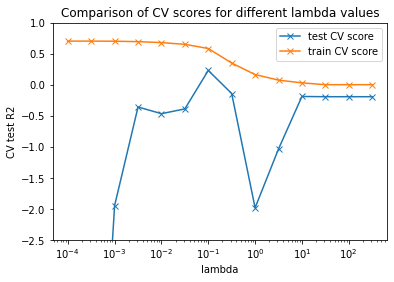

In [32]:
# Plotting the relationship:
CV_test_scores=Lasso_object.cv_results_['mean_test_score']
CV_train_scores=Lasso_object.cv_results_['mean_train_score']
plt.plot(10.0**(np.arange(-4,3,0.5)),CV_test_scores, marker='x', label='test CV score')
plt.plot(10.0**(np.arange(-4,3,0.5)),CV_train_scores, marker='x', label='train CV score')
plt.xlabel('lambda')
plt.ylabel('CV test R2')
plt.title('Comparison of CV scores for different lambda values')
plt.xscale('log')
plt.ylim((-2.5, 1))
plt.legend()
plt.show()

We see here that the best lambda is chosen as 0.1 from a list of lambdas ranging from 10^-4 to 10^1.5. The best value is chosen by cross validation where the lambda of 0.1 had the highest average R^2 score in the out-of-sample sets.

**3.2** Plot the trajectory curves of the main effects `['rate_w28','rate_w27','dose1_w28','votergap20']` from this model: the estimates of the $\beta$ coefficients as a function of $\lambda$.  Interpret what you notice.


In [33]:
#3.2:
main_effects = ['rate_w28','rate_w27','dose1_w28','votergap20']
lambdas = 10.0**(np.arange(-4,2))  #[1e-4, 1e-2, 1, 5, 10, 15, 50]
coef_list = [] 
for a in lambdas:
    Lasso_ob = linear_model.LassoCV(alphas=[a], cv=5, max_iter=10000).fit(full_X, y_std.ravel())
    coef_list.append(Lasso_ob.coef_[[5,1,2,13]])
coef_list = np.array(coef_list)

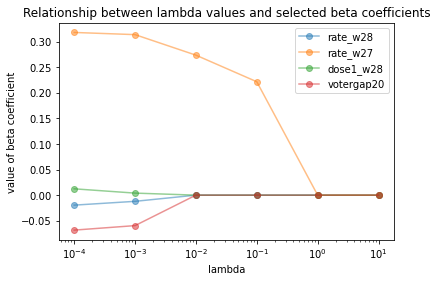

In [34]:
# Plotting the 4 selected predictors:
for i in range(4):
    plt.plot(10.0**(np.arange(-4,2)), coef_list[:,i],  marker='o', label=main_effects[i], alpha=0.5)
plt.legend()
plt.xlabel('lambda')
plt.ylabel('value of beta coefficient')
plt.title('Relationship between lambda values and selected beta coefficients')
plt.xscale('log')
plt.show()

##### Answer 3.2:
The plot shows that rate_w27 has the strongest relationship with rate_w29. It has a positive relationship, which is expected since a high rate will usually mean that there will still be a somewhat high rate two weeks after. It is however interesting that rate_w28 is not the strongest, and actually shows a negative relationship in this model. This must be caused by multicolinearity with rate_w27.
All these 4 coefficients are shrinked to zero at a lambda of 1 and above, which means that when we add a penalization term of 1 to the loss function, none of these variables are considered to have an effect on rate_w29. 

**3.3** Fit a well-tuned random forest model to predict `rate_w29` from the predictors listed in 3.1.  Report your choice of the best tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.


In [35]:
# Note: Choosing to use un-standardized first order terms for X since decision trees does not require the preprocessing we did previously:
first_order_terms = ['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income'
                ,'nodegree','bachelor','inactivity','obesity','density','votergap20']
first_order_terms_test = ['rate_w29','rate_w28','dose1_w29','hispanic','minority','female','unemployed', 'income'
                ,'nodegree','bachelor','inactivity','obesity','density','votergap20'] #this is for later.
X = covid_clean[first_order_terms]
y = covid_clean['rate_w29']
X_test = covid_clean[first_order_terms_test]
y_test = covid_clean['rate_w30']

# Using RandomForest
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(oob_score=True, random_state=42, n_jobs=-1)

# Using ParameterGrid to efficiently compare different values:
from sklearn.model_selection import ParameterGrid
param_dictionary = {'n_estimators': [250,300], 'min_samples_split': [2, 5, 10, 20, 40], 'max_features': [0.3, 0.4, 0.6, 0.8]}
param_grid = ParameterGrid(param_dictionary)

# For loop to find the best set of hyperparameters:
error = [100]
max_estimators = max([params['n_estimators'] for params in param_grid])
best_params_rf = {}
for params in param_grid:
    randomforest.set_params(**params)
    randomforest.fit(X, y)
    # Record the OOB error for each model
    oob_error = 1 - randomforest.oob_score_
    if oob_error < error:
        best_params_rf = randomforest.get_params()
        error = oob_error
        if params['n_estimators'] == max_estimators:
            randomforest.set_params(warm_start=False)
        else:
            randomforest.set_params(warm_start=True)

In [36]:
max_feats = best_params_rf['max_features']
min_split = best_params_rf['min_samples_split']
n_est = best_params_rf['n_estimators']
print(f'The best scoring model has a min_samples_split of {min_split}, and max_features of {max_feats}.')
print(f'Also trying n_estimators up to {n_est} since this should be enough.')
print(f'The R2 can be gathered from our free out-of-bag set, and is {1-error:.3}.')

The best scoring model has a min_samples_split of 20, and max_features of 0.6.
Also trying n_estimators up to 300 since this should be enough.
The R2 can be gathered from our free out-of-bag set, and is 0.646.


##### Answer 3.3:
Choosing not to supplement with a plot of hyperparameters here since the ranges that are covered with parametergrid is sufficient for finding a decent value for the hyperparameters.
The hyperparameters are presented in the print above. These values for n_estimators is chosen to a reasonablely high value (300 should be enough). min_samples_split and max_features has been chosen based on which combination that scores best on the out-of-bag set, from a range of reasonable values for both. 

**3.4** Interpret the relationship between `rate_w29` and `dose1_w28` from the random forest model in 3.3.  Is there any evidence of interactive effects in this model involving `dose1_w28`?  How do you know?  Provide a reasonable visual (or a few visuals) to help you with these tasks and interpret what you see. 



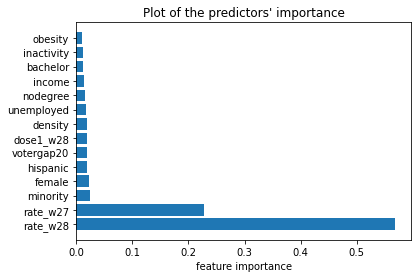

,predictor,feature_importance
0,rate_w28,0.568169
1,rate_w27,0.227989
4,minority,0.024746
5,female,0.022417
3,hispanic,0.019428
13,votergap20,0.019166
2,dose1_w28,0.018904
12,density,0.018456
6,unemployed,0.016965
8,nodegree,0.015274


In [38]:
# Fitting the model with the best parameters found:
best_params_rf['warm_start'] = False
randomforest.set_params(**best_params_rf).fit(X,y)

# Making an overview of the predictors ranked from highest to lowest feature importance:
importances = pd.DataFrame(zip(first_order_terms,randomforest.feature_importances_),columns=['predictor'
               ,'feature_importance']).sort_values(by='feature_importance',ascending=False)
plt.barh(importances['predictor'],importances['feature_importance'])
plt.title('Plot of the predictors\' importance')
plt.xlabel('feature importance')
plt.show()
display(importances)

##### Answer 3.4:
From the visuals above we see that the model did not determine dose1_w28 to be of high importance for the prediction of rate_w29. However, we would expect the perentage of the county that has one vaccination dose to have a great impact on the rate of covid. My interpretation is that this is caused by collinearity between dose1 and the covid rates. For counties where the dose1 is high, the measures of covid has been low in week 27 and 28, and the model interprets this to be the strongest predictor although the effect of this variable is depending strongly on dose1.  

I realize now it is asked about interaction effects. To check for this I would plot the dose1 scores against the rate_w29 for different values of the variable I want to check for (e.g. density which could be fair to assume has an interaction effect, since a combination of high density and low vaccination rates could lead to a higher chance of spread). So after dividing the set into one part with high density and one with low density I can plot the lines to see if they are parallel.
Parallel lines = no interaction effect, non-parallel lines = interaction effect. I will see if I get time at the end to actually plot this out.

**3.5** Fit a well-tuned boosting model to predict `rate_w29` from the predictors listed in 3.1.  Report your best choice of the tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: again, do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.



In [39]:
# Using GradientBoostingRegressor with gridsearchCV to tune over hyperparameters.
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

X = covid_clean[first_order_terms]
y = covid_clean['rate_w29']

clf = GradientBoostingRegressor(random_state=42, warm_start=True)
# Setting ranges of the parameters to check:
parameters = {'n_estimators': [50,100,200], 'max_depth':[2,3,4,8], 'learning_rate': [0.01, 0.05]}
boost = GridSearchCV(clf, param_grid=parameters, cv=5, scoring="r2")
boost.fit(X, y)
best_boost_params = boost.best_params_
print(f'The set of tuning parameters that scores best is {boost.best_params_}')
print(f'This model has an average out-of-sample R2 score of {boost.best_score_:.4}')

The set of tuning parameters that scores best is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
This model has an average out-of-sample R2 score of 0.5294


##### Answer 3.5:
It is chosen a range of reasonable values that is feeded into the GridSearchCV function that compares the out of sample CV score for all combinations of the hyperparameters that are given. The tuning parameters and out-of-sample  𝑅2 is presented above.

**3.6** Improve upon your favorite/best predictive model from 3.1, 3.3, or 3.5, by including other provided feature, by doing feature engineering, or by doing variable removal/selection.  Explain your choices.  Provide an estimate of out-of-sample $R^2$. 



In [40]:
# Starting with my randomforest model from 3.3:
X_fav = covid_clean[first_order_terms] 
# Choosing to add these three columns to the dataset because they have shown to be strong predictors for covid rate:
X_fav.insert(0, 'population', covid_clean['population'])
X_fav.insert(1, 'deaths_w28', covid_clean['deaths_w28'])
X_fav.insert(2, 'fully_w28', covid_clean['fully_w28'])
X_fav.head(1)

,population,deaths_w28,fully_w28,rate_w28,rate_w27,dose1_w28,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,votergap20
0,50756,113,25.3,0.728978,0.354638,32.7,2.842,22.733,51.475,5.2,54.366,13.8,21.9,28.6,34.1,91.8,-44.418437


In [41]:
# Performing RandomForestRegression like in 3.3, but with the new predictors included as well:

randomforest_fav = RandomForestRegressor(oob_score=True, random_state=42, n_jobs=-1)
# Using ParameterGrid to efficiently compare different values:
from sklearn.model_selection import ParameterGrid
param_dictionary = {'n_estimators': [250,300], 'min_samples_split': [2, 5, 10, 20, 40], 'max_features': [0.3, 0.4, 0.6, 0.8]}
param_grid = ParameterGrid(param_dictionary)

# Finding the best set of hyperparameters:
error_fav = [100]
best_params_fav = {}
for params in param_grid:
    randomforest_fav.set_params(**params)
    randomforest_fav.fit(X_fav, y)
    # Record the OOB error for each model
    oob_error = 1 - randomforest_fav.oob_score_
    if oob_error < error_fav:
        best_params_fav = randomforest_fav.get_params()
        error_fav = oob_error

In [42]:
randomforest_fav_fit = RandomForestRegressor().set_params(**best_params_fav).fit(X_fav, y)
print(f'The R2 from our free out-of-bag set is {1-error_fav:.3}.')

The R2 from our free out-of-bag set is 0.65.


##### Answer 3.6:
To recap, I chose to include the predictors population,	deaths_w28 and fully_w28 to my RandomForest model, because I have seen these predictors to be strong in prediction and can have some potential to improve a model with RandomForest. The new model does slightly better on the out-of-sample R^2 than the original one.

**3.7** Evaluate your models from 3.1, 3.3, 3.5, and 3.6 on the test set (this will take some work...refer back to 2.8) using $R^2$.  How do these model's $R^2$ in test compare to the out-of-sample $R^2$ when tuning?  Explain whether this is surprising or not?

In [43]:
# Assembling the R2 scores for both the test set and the OOS (test sets are prepared in each individual task to keep order):

# 3.1:
Lasso_test_R2 = sk.metrics.r2_score(y_std_test.ravel(), Lasso_best_model.predict(full_X_test))
print(f'The Lasso regularized model gets an R^2 score on the test set of {Lasso_test_R2:.4}. For comparison, the out-of-sample R^2 was {Lasso_object.best_score_:.4}')

# 3.3:
X_test = covid_clean[first_order_terms_test]
y_test = covid_clean['rate_w30']
randomforest_best =RandomForestRegressor(random_state=42,max_features=max_feats,min_samples_split=min_split,n_estimators=n_est)
randomforest_best.fit(X,y)
rf_test_R2 = sk.metrics.r2_score(y_test, randomforest_best.predict(X_test))
print(f'The RandomForest model gets an R^2 score on the test set of {rf_test_R2:.4}. For comparison, the out-of-sample R^2 was {1-error:.4}')

# 3.5: boosting Test set check:
# X_test = covid_clean[first_order_terms_test]
# y_test = covid_clean['rate_w30']
boosting = GradientBoostingRegressor(random_state=42).set_params(**best_boost_params)
boosting.fit(X, y)
boost_test_R2 = sk.metrics.r2_score(y_test, boosting.predict(X_test))
# boosting.r2_score(X_test, y_test)
# boost.best_params_
print(f'The boosting model gets an R^2 score on the test set of {boost_test_R2:.4}. For comparison, the out-of-sample R^2 was {boost.best_score_:.4}')

# # 3.6 
X_fav_test = covid_clean[first_order_terms_test] 
# Adding the same three columns to the test set as was added to the set from 3.3:
X_fav_test.insert(0, 'population', covid_clean['population'])
X_fav_test.insert(1, 'deaths_w29', covid_clean['deaths_w29'])
X_fav_test.insert(2, 'fully_w29', covid_clean['fully_w29'])
# Test score:
fav_test_R2 = sk.metrics.r2_score(y_test, randomforest_fav_fit.predict(X_fav_test))
print(f'The favorite model from 3.6 gets an R^2 score on the test set of {fav_test_R2:.4}. For comparison, the out-of-sample R^2 was {1-error_fav:.4}')

pd.DataFrame([[Lasso_test_R2, Lasso_object.best_score_], [rf_test_R2, 1-error],[boost_test_R2, boost.best_score_],[fav_test_R2, 1-error_fav]], 
             columns=['Test R2', 'Out-of-sample R2'], index=['Lasso','RandomForest','Boosting', 'Favorite model'])

The Lasso regularized model gets an R^2 score on the test set of 0.4607. For comparison, the out-of-sample R^2 was 0.2295
The RandomForest model gets an R^2 score on the test set of 0.6704. For comparison, the out-of-sample R^2 was 0.6461
The boosting model gets an R^2 score on the test set of 0.6238. For comparison, the out-of-sample R^2 was 0.5294
The favorite model from 3.6 gets an R^2 score on the test set of 0.6748. For comparison, the out-of-sample R^2 was 0.65


,Test R2,Out-of-sample R2
Lasso,0.460723,0.229451
RandomForest,0.670423,0.646094
Boosting,0.623809,0.529399
Favorite model,0.674837,0.650027


##### Answer 3.7:
The models perform better on the test set than the out-of-sample set. This is probably because each out-of-sample score is fitted to 1/(k-1) of the counties and then tested on the remainding 1/k counties, which might be very different in nature to the ones they were fitted on. In comparison, the $R^2$ from test was fitted on all the counties, then tested on the same counties (but for the test set constructed by looking at the next week). This approach therefore has a better potential of obtaining high accuracy. 

---

## Question 4 [10pts]: Going further

**4.1** Use all of the useable variables in `demo` and `masks` to create clusters of observations based on the $K$-means clustering approach.  Be sure to carefully select a reasonable choice for $K$.  Explain your choice (a visual may help with this).

**4.2** Use your created clusters and incorporate them as predictor(s) into a linear regression model to assess whether the relationships you measured in the model from 2.6 depend on cluster type.  Comment on what you notice.  Determine whether out-of-sample $R^2$ has improved using this model (in comparison to the model from 2.6) based on 5-fold CV.

**4.3: BONUS** Find data online to improve the prediction accuracy of your best model. Be sure to cite your source of your data and the approach you took into incorporating these new data.  Note: this is only worth up to 3 bonus points, so do not spend too much effor on this part over improving ealrier parts of the exam.

## Answers

**4.1** Use all of the useable variables in `demo` and `masks` to create clusters of observations based on the $K$-means clustering approach.  Be sure to carefully select a reasonable choice for $K$.  Explain your choice (a visual may help with this).

Text(0.5, 1.0, 'Plot to find the elbow point for K')

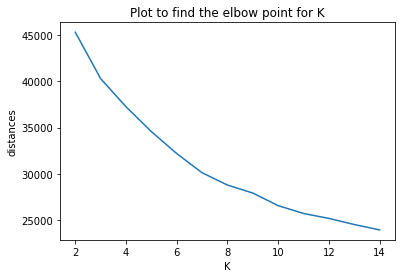

In [44]:
from sklearn.cluster import KMeans
cluster_names = ['fips','population', 'hispanic',
       'minority', 'female', 'unemployed', 'income', 'nodegree', 'bachelor',
       'inactivity', 'obesity', 'density', 'votergap20', 'votergap16', 'never',
       'rarely', 'sometimes', 'frequently', 'always'] 
cluster_variables = covid_clean[cluster_names]

    # County number 69 and 70 in our covid_clean set has an error as value for Votergap16. 
    # This could be modelled, or imputed based on the real values fround from the internet. For simplicity I choose 
    # to impute a value of 0, stating equal votes between Clinton and Trump here, since it is only 2 values.
cluster_variables['votergap16'][68:70] = 0
# Changing from type object to float:
cluster_variables['votergap16'] = cluster_variables.votergap16.astype(float)

# Standardizing the variables:
std_variables = StandardScaler().fit_transform(cluster_variables.iloc[:,1:])  
std_variables = pd.DataFrame(std_variables, columns = cluster_names[1:]) # making dataframe
# Planned to add in fips, but i don't think it should be done here:
# std_variables.insert(loc=0, column='fips', value=cluster_variables['fips']) 

Ks = np.arange(2,15,1)
distances = []
for K in Ks:
    model = KMeans(n_clusters=K, random_state=42).fit(std_variables)
    distances = np.append(distances, model.inertia_)

plt.plot(Ks,distances);
plt.xlabel('K')
plt.ylabel('distances')
plt.title('Plot to find the elbow point for K')

##### Answer 4.1:
Both a K of 3 and 7 could be reasonable in this situation, but a simpler model is often preferred. I therefore choose a value of 3 for my K.

**4.2** Use your created clusters and incorporate them as predictor(s) into a linear regression model to assess whether the relationships you measured in the model from 2.6 depend on cluster type.  Comment on what you notice.  Determine whether out-of-sample $R^2$ has improved using this model (in comparison to the model from 2.6) based on 5-fold CV.


R^2 comparison:
- Including clusters, the R^2 from 5-fold CV is 0.486711
- The old model without clusters got an R^2 from 5-fold CV of 0.489703


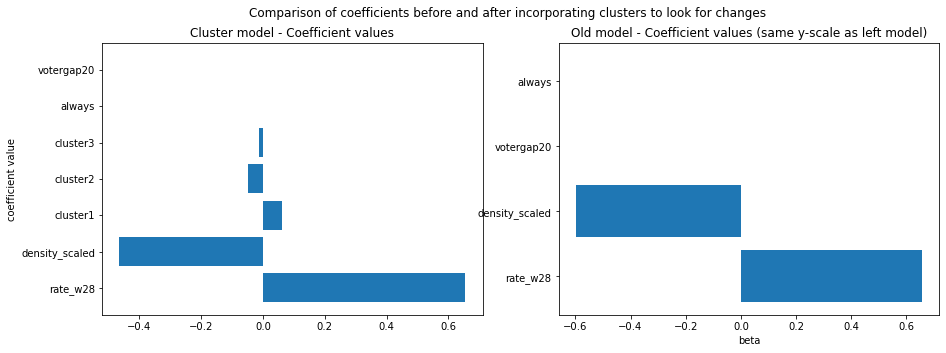

In [45]:
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(std_variables)

# Creating dummy vairables in the dataset for inclusion in regression model:
covid_clean['cluster1'] = (kmeans2.predict(std_variables)==0)*1
covid_clean['cluster2'] = (kmeans2.predict(std_variables)==1)*1
covid_clean['cluster3'] = (kmeans2.predict(std_variables)==2)*1

# Using the same predictors as in 2.6 together with the three cluster variables:
predictors_with_clusters = ['density_scaled', 'always','rate_w28', 'votergap20', 'cluster1','cluster2','cluster3'] 

# Assigning X and y:
X_full_cluster = covid_clean[predictors_with_clusters]
y = covid_clean['rate_w29']
# X_full = covid_clean[predictors_to_include] # From the old model

# Fitting multiple regression model:
reg_linear_cluster = LinearRegression().fit(X_full_cluster, y)

# Creating a dataframe of all coefficients sorted from highest absolute value to lowest:
zip(predictors_with_clusters, reg_linear_cluster.coef_)
coeffs_clust = pd.DataFrame(zip(predictors_with_clusters, reg_linear_cluster.coef_), columns=['Predictor_inc_cluster','Coefficients'])
coeffs_clust=coeffs_clust.reindex(coeffs_clust.Coefficients.abs().sort_values(ascending=False).index)

# 5-fold cv to get OOS r2 score:
from sklearn.model_selection import cross_val_score
print(f'R^2 comparison:\n- Including clusters, the R^2 from 5-fold CV is {np.max(cross_val_score(reg_linear_cluster, X_full_cluster, y, cv=5)):.6}')
print(f'- The old model without clusters got an R^2 from 5-fold CV of {np.max(cross_val_score(reg_linear_all, X_full, y, cv=5)):.6}')


# Chart of coefficients:
fig, ax = plt.subplots(1,2,figsize=(15,5))#,sharey=True)
fig.suptitle('Comparison of coefficients before and after incorporating clusters to look for changes')
ax[0].barh(coeffs_clust.iloc[0:10,0],coeffs_clust.iloc[0:10,1])
ax[0].set_title('Cluster model - Coefficient values')
ax[0].set_ylabel('coefficient value')
# ax[0].vlines(0)#,ymin=0,ymax=900)

ax[1].barh(coeffs.iloc[:,0],coeffs.iloc[:,1])
ax[1].set_title('Old model - Coefficient values (same y-scale as left model)')
ax[1].set_xlabel('beta')
plt.show()

# Comparing the coefficients' ranked dataframes: (removed because of too much information)
# display(coeffs_clust)
# display(coeffs)

##### Answer 4.2: 
When including the three cluster dummies in the linear regression model the R^2 improves, but is only marginally better than using y-bar as predictor.We see from the chart that the cluster coefficients are much larger than the ones from the previous model, suggesting that the relationship between these clusters has higher relation to the rate of covid than density and people stating they always wear masks in public. But they both seems to be doing a poor job in prediction here.

**4.3: BONUS** Find data online to improve the prediction accuracy of your best model. Be sure to cite your source of your data and the approach you took into incorporating these new data.  Note: this is only worth up to 3 bonus points, so do not spend too much effor on this part over improving ealrier parts of the exam.

##### Comment:
I wanted to check weather my earlier comment about age was correct: Will counties with younger people, e.g. students have a positive correlation with covid rate. The only issue was that after an hour of googling, there was incredibly no overview of the median age (or mean) per US county. I finally found one page that links to new pages for each state where a table shows the meadian ages per county. I therefore used BeatifulSoup to scrape these websites to get the predictor I needed:

In [46]:
# Scraping for median ages. Source: https://fred.stlouisfed.org/release/tables?rid=430&eid=326753
from bs4 import BeautifulSoup
import requests 
# page = requests.get("https://fred.stlouisfed.org/https://fred.stlouisfed.org/release/tables?rid=430&eid=326754")
mainpage = requests.get("https://fred.stlouisfed.org/release/tables?rid=430&eid=326753")
# soup = BeautifulSoup(page.text, 'html.parser')
soup_main = BeautifulSoup(mainpage.text, 'html.parser')

In [47]:
median_ages = []
counties = []
for state in range(51):
    site = requests.get("https://fred.stlouisfed.org/"+soup_main.find('table',border="0").find_all('tr')[state].td.a["href"])  #linken (mangler hovedd)
    site = BeautifulSoup(site.text, 'html.parser')
    for i in range(int(soup_main.find('table',border="0").find_all('tr')[state].td.text[-8:-6].strip().replace("(", ""))):
        median_ages.append(site.find('table',id="release-elements-tree").tbody.find_all('tr')[i].find_all('td')[2].text.strip())
        counties.append(site.find('table',id="release-elements-tree").tbody.find_all('tr')[i].find_all('td')[1].find_all('span')[0].a.text)
ages_df = pd.DataFrame(median_ages,counties);#, columns=['age'])

In [48]:
# Dataframe of ages (without names as index):
ages = pd.DataFrame(zip(counties,median_ages), columns=['county','median_age'])

# Now I need to split the names up so that it matches the ones in covid_clean:
ages['county'] = ages.county.str.split().str.get(0)
print('Nr of counties listed on the site is',ages.shape[0])
ages.head()

Nr of counties listed on the site is 2240


,county,median_age
0,Autauga,38.2
1,Baldwin,43.0
2,Barbour,40.4
3,Bibb,40.9
4,Blount,40.7


Great, now we have the median ages, but see there is one problem. There are only 2240 counties from this website. 
This is less than ideal, and means we have to drop almost 1/3 of our counties which means a huge drop in the model's comprehensiveness and predictability. I also realized that county name is not a unique identifier, and will probably end up being matched incorrectly, and should therefore rather be excluded. However, for the sake of this task I decide to accept this, and carry on with the procedure I would do if there was no problems.  

In [49]:
# Merging dataset by dropping all the counties that does not have age included:
covid_clean = pd.read_csv('data/covid_clean.csv')
# Removing duplicates entirely without structure, least of two evils in this situation.
ages = ages.drop_duplicates(['county'])
covid_final = covid_clean.drop_duplicates(['county'])
covid_with_age = covid_final.merge(ages,on="county")

In [50]:
first_order_terms = ['median_age','rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income'
                ,'nodegree','bachelor','inactivity','obesity','density','votergap20']
first_order_terms_test = ['median_age','rate_w29','rate_w28','dose1_w29','hispanic','minority','female','unemployed', 'income'
                ,'nodegree','bachelor','inactivity','obesity','density','votergap20'] #this is for later.

In [51]:
# Performing RandomForestRegression like in 3.3, but with the new predictors included as well:

randomforest_fav = RandomForestRegressor(oob_score=True, random_state=42, n_jobs=-1)
# Using ParameterGrid to efficiently compare different values:
from sklearn.model_selection import ParameterGrid
param_dictionary = {'n_estimators': [250,300], 'min_samples_split': [2, 5, 10, 20, 40], 'max_features': [0.3, 0.4, 0.6, 0.8]}
param_grid = ParameterGrid(param_dictionary)

# For loop to find the best set of hyperparameters:
error_fav = [100]
best_params_fav = {}
for params in param_grid:
    randomforest_fav.set_params(**params)
    randomforest_fav.fit(X_fav, y)
    # Record the OOB error for each model
    oob_error = 1 - randomforest_fav.oob_score_
    if oob_error < error_fav:
        best_params_fav = randomforest_fav.get_params()
        error_fav = oob_error

In [52]:
randomforest_fav_fit = RandomForestRegressor().set_params(**best_params_fav).fit(X_fav, y)
print(f'The OOB R2 score is {1-error_fav:.3}.')

The OOB R2 score is 0.65.


##### Answer 4.3:
As mentioned above, there are multiple issues with the fact that counties is not a unique identifier, and this model is therefore rendered useless. But the procedure it the same to obtain a successfull model, just replacing county names with Fips code. If I had had more time I could have merged the correct fips code by also including which state the county was gathered from when scraping, as each county is gathered from a site specific to its state. 

Thank you for an absolutely great summer semester, I will be back for 109b in the spring :)